In [5]:
# Nativos
import os
import sys

#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

set_parameter_csv = {
    'sep': ',',
    'encoding': 'ISO-8859-1',
    'low_memory': False
}

In [3]:
train = pd.read_csv('data/Data_Train_SMDSC.csv', **set_parameter_csv)
train.head()

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,2208,33.0,128.000000,6.0,3230.0,192.0,2,3.0,2,1
1,2211,32.0,185.000000,7.0,2930.0,217.0,2,1.0,5,1
2,2212,28.0,150.630775,7.0,1883.7,202.0,2,1.0,2,1
3,2216,56.0,200.000000,0.0,850.0,194.0,2,1.0,5,1
4,2218,32.0,131.000000,65.0,3200.0,200.0,2,1.0,2,1


In [4]:
test = pd.read_csv('data/Data_Test_SMDSC.csv', **set_parameter_csv)
test.head()

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel
0,1,28,122,9,1115.09,206,4,1,5
1,2,27,173,61,2450.00,205,2,1,5
2,3,37,185,4,1390.00,177,2,3,5
3,4,34,262,20,2200.00,216,2,1,2
4,5,40,150,17,10000.00,185,2,1,2


# ANALISS DE NULOS

In [9]:
def null_verificator(data):        
    if data.isnull().any().any():
        view_info = pd.DataFrame(
            pd.concat(
                [data.isnull().any(), 
                 data.isnull().sum(),
                 data.dtypes], 
                axis=1)
        )
        view_info.columns = ['Nulos', 'Cantidad', 'Tipo Col']
        size = data.shape[0]
        view_info['Porcentaje'] = view_info['Cantidad'].apply(
            lambda x: str(np.round(0 if not x else x*100 / size, 2)) + ' %')
        return view_info
    else:
        return "DATA LIMPIA DE NULOS"

In [10]:
null_verificator(train)

'DATA LIMPIA DE NULOS'

In [11]:
null_verificator(test)

'DATA LIMPIA DE NULOS'

# ANALISIS DESCRIPTIVO DEL TRAIN

In [8]:
list_percentiles = [0.01, .05,.1, .125,.25, .375, .5, .625, .75, .85, .95, .99]

train.drop(['ID', 'riesgo'], axis=1).describe(
    percentiles=list_percentiles
)

,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,36.701877,183.799881,26.913492,4495.308222,197.572321,2.583333,1.753985,3.162222
std,9.826240,73.056120,32.681814,5462.875486,19.283236,0.922388,1.245716,1.475259
min,20.000000,95.000000,0.000000,123.700000,134.000000,1.000000,1.000000,1.000000
1%,21.000000,109.990000,0.000000,654.430700,156.000000,1.000000,1.000000,1.000000
5%,24.000000,118.000000,0.000000,800.000000,167.000000,2.000000,1.000000,2.000000
10%,25.000000,123.000000,0.000000,947.688000,174.000000,2.000000,1.000000,2.000000
12.5%,26.000000,126.000000,0.000000,1008.653750,175.000000,2.000000,1.000000,2.000000
25%,29.000000,137.000000,0.000000,1407.102500,183.000000,2.000000,1.000000,2.000000
37.5%,32.000000,148.000000,6.000000,2000.000000,193.000000,2.000000,1.000000,2.000000


las variables: tipo_vivienda, zona, nivel son categoricas

In [13]:
for col in ['tipo_vivienda', 'zona', 'nivel']:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)

In [14]:
train.describe(include=['object', 'bool'])

,tipo_vivienda,zona,nivel
count,4500,4500,4500
unique,4,11,5
top,2,1.0,2
freq,3092,3082,2497


In [15]:
def graphs_analysis(data, col_init, col_out, **kwargs):
    color_label = kwargs.get('color_label', 'black')
    params_default = get_default_args(pd.value_counts)
    
    params_default = {
        k:v for k, v in {**params_default, **kwargs}.items() if k in params_default
    }
    
    print(pd.DataFrame(data[col_init]).corrwith(data[col_out]))
    
    fig, axes = plt.subplots(nrows=2, ncols=2)
    graphs = [
        data[col_init].value_counts(**params_default).plot(ax=axes[0,0], figsize=(15,10)),
        data[col_init].value_counts(**params_default).plot.bar(ax=axes[0,1]),
        sns.lineplot(x=col_init, y=col_out, data=data, ax=axes[1,0]),
        sns.barplot(x=col_init, y=col_out, data=data, ax=axes[1,1])
    ]
    for _ in graphs:
        _.xaxis.label.set_color(color_label)
        _.tick_params(colors=color_label)

# ANALIZANDO COMPORTAMEINTO DE LAS VARIABLES CATEGORICAS

Series([], dtype: float64)


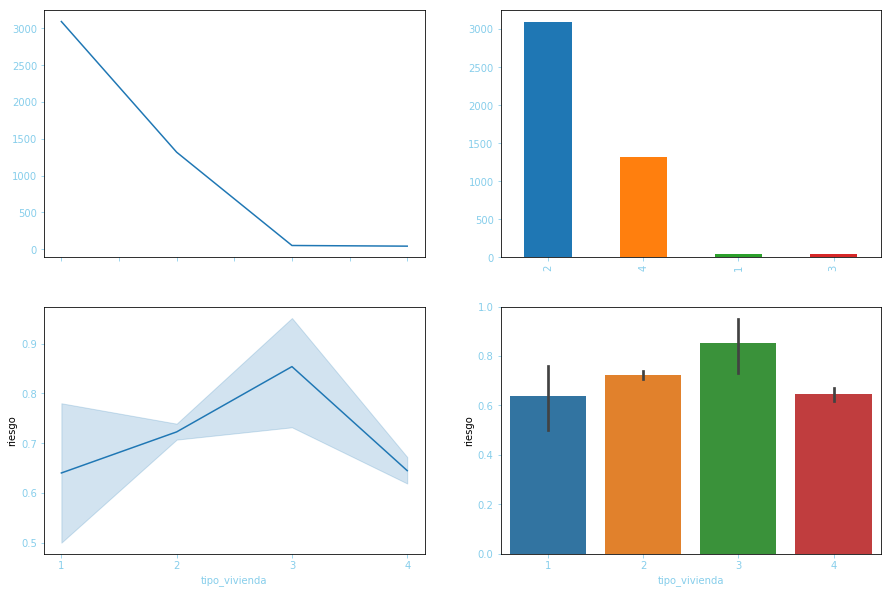

In [17]:
graphs_analysis(train, 'tipo_vivienda', 'riesgo', color_label='skyblue')

In [21]:
train['tipo_vivienda'].unique(), test['tipo_vivienda'].unique()

(array(['2', '4', '3', '1'], dtype=object),
 array(['4', '2', '1', '3'], dtype=object))

Series([], dtype: float64)


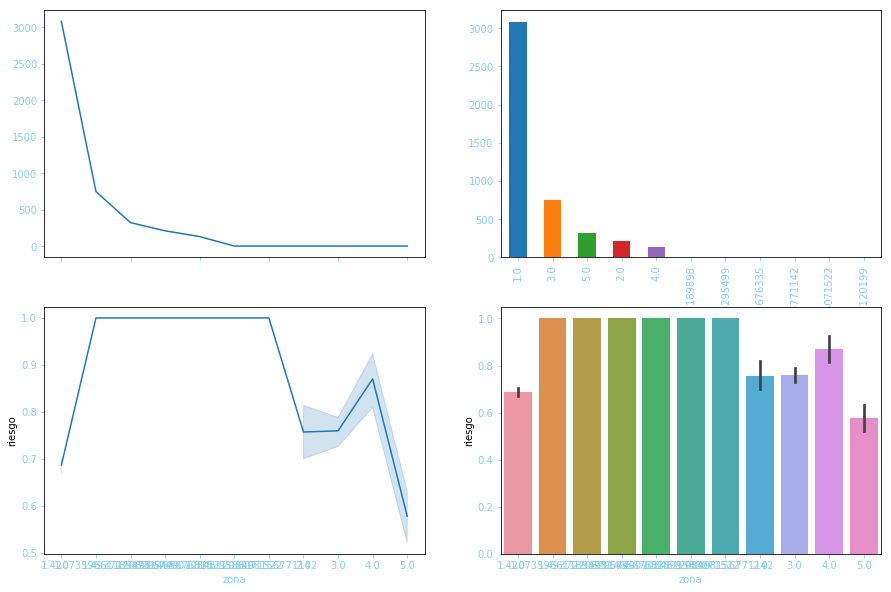

In [19]:
graphs_analysis(train, 'zona', 'riesgo', color_label='skyblue')

In [22]:
train['zona'].unique(), test['zona'].unique()

(array(['3.0', '1.0', '5.0', '2.0', '4.0', '1.54731465676335',
        '1.81099536071522', '1.49372208295499', '1.4207359661189898',
        '1.98408156771142', '1.6740070846120199'], dtype=object),
 array(['1', '3', '4', '2', '5'], dtype=object))

In [29]:
train[
    (train['zona'].astype(float) > 1) & (train['zona'].astype(float) < 2)
].head()

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
2008,2737,28.0,125.0,13.0,1145.10,194.0,4,1.54731465676335,5,1
2066,2855,28.0,156.0,17.0,2500.00,192.0,2,1.81099536071522,2,1
2121,2963,36.0,147.0,32.0,1200.00,204.0,2,1.49372208295499,2,1
2198,3127,46.0,278.0,50.0,2300.00,185.0,2,1.4207359661189898,2,1
2279,3292,47.0,137.0,56.0,990.79,185.0,2,1.98408156771142,5,1


In [30]:
train['zona'] = train['zona'].apply(lambda x: str(round(float(x))))

In [32]:
train['zona'].unique(), test['zona'].unique()

(array(['3', '1', '5', '2', '4'], dtype=object),
 array(['1', '3', '4', '2', '5'], dtype=object))

Series([], dtype: float64)


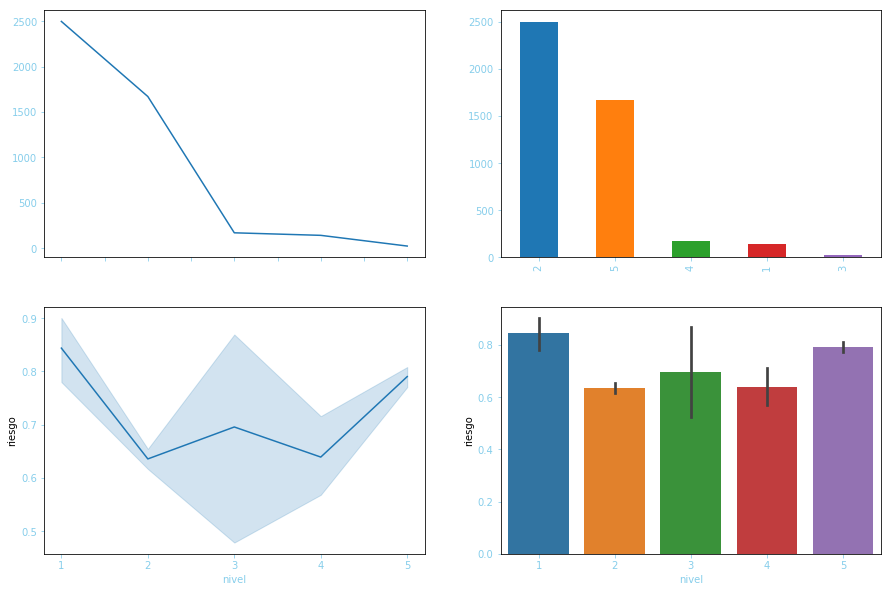

In [20]:
graphs_analysis(train, 'nivel', 'riesgo', color_label='skyblue')

In [23]:
train['nivel'].unique(), test['nivel'].unique()

(array(['2', '5', '1', '4', '3'], dtype=object),
 array(['5', '2', '3', '1', '4'], dtype=object))

In [33]:
def serie_ratio_convergencia(data, var, col_target='TARGET'):
    df = data.groupby(
        by=[var]
    ).mean()[col_target]
    del df.index.name
    return df

def replace_value_ratio(train, test, lista_vars, col_target='target'):
    for var in lista_vars:
        print('>> ', var.upper())
        serie_ratio = serie_ratio_convergencia(
            train, var, col_target=col_target
        )
        print(train[var].unique())
        print(test[var].unique())
        train[var + '_ratio'] = train[var].apply(lambda x: serie_ratio.get(x, 0))
        test[var + '_ratio'] = test[var].apply(lambda x: serie_ratio.get(x, 0))
    return train, test

In [34]:
lista_vars = ['tipo_vivienda', 'zona', 'nivel']
train, test = replace_value_ratio(train, test, lista_vars, col_target='riesgo')

>>  TIPO_VIVIENDA
['2' '4' '3' '1']
['4' '2' '1' '3']
>>  ZONA
['3' '1' '5' '2' '4']
['1' '3' '4' '2' '5']
>>  NIVEL
['2' '5' '1' '4' '3']
['5' '2' '3' '1' '4']


In [35]:
train.head()

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo,tipo_vivienda_ratio,zona_ratio,nivel_ratio
0,2208,33.0,128.000000,6.0,3230.0,192.0,2,3,2,1,0.72251,0.75968,0.635563
1,2211,32.0,185.000000,7.0,2930.0,217.0,2,1,5,1,0.72251,0.68677,0.790419
2,2212,28.0,150.630775,7.0,1883.7,202.0,2,1,2,1,0.72251,0.68677,0.635563
3,2216,56.0,200.000000,0.0,850.0,194.0,2,1,5,1,0.72251,0.68677,0.790419
4,2218,32.0,131.000000,65.0,3200.0,200.0,2,1,2,1,0.72251,0.68677,0.635563


In [36]:
test.head()

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,tipo_vivienda_ratio,zona_ratio,nivel_ratio
0,1,28,122,9,1115.09,206,4,1,5,0.644647,0.68677,0.790419
1,2,27,173,61,2450.00,205,2,1,5,0.722510,0.68677,0.790419
2,3,37,185,4,1390.00,177,2,3,5,0.722510,0.75968,0.790419
3,4,34,262,20,2200.00,216,2,1,2,0.722510,0.68677,0.635563
4,5,40,150,17,10000.00,185,2,1,2,0.722510,0.68677,0.635563


In [37]:
train.dtypes

ID                       int64
edad                   float64
meses                  float64
max_ant                float64
ingreso                float64
score                  float64
tipo_vivienda           object
zona                    object
nivel                   object
riesgo                   int64
tipo_vivienda_ratio    float64
zona_ratio             float64
nivel_ratio            float64
dtype: object

In [39]:
train_proof = pd.get_dummies(train)
train_proof.head()

,ID,edad,meses,max_ant,ingreso,score,riesgo,tipo_vivienda_ratio,zona_ratio,nivel_ratio,...,zona_1,zona_2,zona_3,zona_4,zona_5,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5
0,2208,33.0,128.000000,6.0,3230.0,192.0,1,0.72251,0.75968,0.635563,...,0,0,1,0,0,0,1,0,0,0
1,2211,32.0,185.000000,7.0,2930.0,217.0,1,0.72251,0.68677,0.790419,...,1,0,0,0,0,0,0,0,0,1
2,2212,28.0,150.630775,7.0,1883.7,202.0,1,0.72251,0.68677,0.635563,...,1,0,0,0,0,0,1,0,0,0
3,2216,56.0,200.000000,0.0,850.0,194.0,1,0.72251,0.68677,0.790419,...,1,0,0,0,0,0,0,0,0,1
4,2218,32.0,131.000000,65.0,3200.0,200.0,1,0.72251,0.68677,0.635563,...,1,0,0,0,0,0,1,0,0,0


In [40]:
test_proof = pd.get_dummies(test)
test_proof.head()

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda_ratio,zona_ratio,nivel_ratio,tipo_vivienda_1,...,zona_1,zona_2,zona_3,zona_4,zona_5,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5
0,1,28,122,9,1115.09,206,0.644647,0.68677,0.790419,0,...,1,0,0,0,0,0,0,0,0,1
1,2,27,173,61,2450.00,205,0.722510,0.68677,0.790419,0,...,1,0,0,0,0,0,0,0,0,1
2,3,37,185,4,1390.00,177,0.722510,0.75968,0.790419,0,...,0,0,1,0,0,0,0,0,0,1
3,4,34,262,20,2200.00,216,0.722510,0.68677,0.635563,0,...,1,0,0,0,0,0,1,0,0,0
4,5,40,150,17,10000.00,185,0.722510,0.68677,0.635563,0,...,1,0,0,0,0,0,1,0,0,0


In [42]:
del train['tipo_vivienda']
del train['zona']
del train['nivel']

del test['tipo_vivienda']
del test['zona']
del test['nivel']

In [43]:
train.columns

Index(['ID', 'edad', 'meses', 'max_ant', 'ingreso', 'score', 'riesgo',
       'tipo_vivienda_ratio', 'zona_ratio', 'nivel_ratio'],
      dtype='object')

In [44]:
test.columns

Index(['ID', 'edad', 'meses', 'max_ant', 'ingreso', 'score',
       'tipo_vivienda_ratio', 'zona_ratio', 'nivel_ratio'],
      dtype='object')

In [46]:
X_train_proof = train_proof.drop(['ID', 'riesgo'], axis=1)
y_train_proof = train_proof['riesgo']
X_test_proof = test_proof.drop(['ID'], axis=1)

X_train = train.drop(['ID', 'riesgo'], axis=1)
y_train = train['riesgo']
X_test = test.drop(['ID'], axis=1)

In [47]:
X_train.columns.shape

(8,)

In [69]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, TimeSeriesSplit

kfold_on = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_off = StratifiedKFold(n_splits=5, shuffle=False, random_state=42)

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 250],
    'learning_rate': [0.1, 0.01]
}


# lightgbm.LGBMClassifier Python Example - Program Creek
lgb_regressor = lgb.LGBMClassifier(
    save_binary=True,
    objective='regression',
    max_bin=255,
    
)

gbm_1 = GridSearchCV(lgb_regressor, param_grid, cv=kfold_off, n_jobs=4, scoring='roc_auc')
gbm_1.fit(X_train, y_train)

best_params_1 = gbm_1.best_params_
model_1 = gbm_1.best_estimator_
score_1 = gbm_1.best_score_
score_1

0.7038012933568488

In [70]:
lgb_regressor = lgb.LGBMClassifier(
    save_binary=True,
    objective='regression',
    max_bin=255,
    
)
gbm_2 = GridSearchCV(lgb_regressor, param_grid, cv=kfold_on, n_jobs=4, scoring='roc_auc')
gbm_2.fit(X_train_proof, y_train_proof)

best_params_2 = gbm_2.best_params_
model_2 = gbm_2.best_estimator_
score_2 = gbm_2.best_score_
score_2

0.7009071134626691

In [65]:
lgbm_predict_1 = gbm_1.best_estimator_.predict(X_test)
lgbm_predict_2 = gbm_2.best_estimator_.predict(X_test_proof)

In [66]:
test['Classes'] = lgbm_predict_1
prediction = test[['ID', 'Classes']]
prediction.head()

,ID,Classes
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [67]:
prediction['Classes'].value_counts()

1    292
0      8
Name: Classes, dtype: int64

In [68]:
prediction.to_csv('data/prediction_parcial_2.csv', index=False)